Nuevo enfoque...

El conjunto de datos de entrenamiento utilizado no tiene la capacidad de entrenar de forma correcta el modelo, ya que los datos no estan distribuídos de manera uniforme. Es por esto que se buscará generar un conjunto de datos de prueba artificial para entrenar el modelo. 

El conjunto de datos de entrenamiento artificial contará con la generación de: <br>
estados de fase (0,1,2) <br>
cantidad de vehículos en Agustinas (0-15)<br>
cantidad de vehículos en Morandé (0-15)<br>
cantidad de peatones en Agustinas (0-15)<br>
cantidad de peatones en Morandé (0-15)<br>
tiempo de espera acumulado en Agustinas (0-2000)<br>
tiempo de espera acumulado en Morandé (0-2000)

In [22]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sintetización de espacio de estados
from itertools import product

fase = range(0, 3)
cantidades_10 = range(0, 11)
cantidades_16 = range(0, 17)
esperas_2000 = range(0,2006,5)
esperas_1700 = range(0,1706,5) 
combinaciones = list(product(fase, cantidades_16, esperas_2000, cantidades_10, esperas_1700))
df_generado = pd.DataFrame(combinaciones, columns=['sem_fase', 'veh_agus','wait_agus','veh_mor','wait_mor'])

In [4]:
# Selección de muestras
df_sample_100k = df_generado.sample(n=100000)
df_sample_50k = df_generado.sample(n=50000)
df_sample_10k = df_generado.sample(n=10000)

In [6]:
# Aplicar reglas de optimización

def reglas_optimizacion(row):
    wait_threshold = 500
    max_veh_threshold = 2
    if row['sem_fase'] == 1 and row['veh_agus'] <= max_veh_threshold and row['wait_mor'] > wait_threshold:
        return 1
    elif row['sem_fase'] == 0 and row['veh_mor'] <= max_veh_threshold and row['wait_agus'] > wait_threshold:
        return 1
    else:
        return 0

df_sample_100k['Y'] = df_sample_100k.apply(reglas_optimizacion, axis=1)

df_sample_50k['Y'] = df_sample_50k.apply(reglas_optimizacion, axis=1)

df_sample_10k['Y'] = df_sample_10k.apply(reglas_optimizacion, axis=1)

In [8]:
# Verificar % de casos favorables

print(f"Casos favorables 100K: {df_sample_100k['Y'].mean()}")
print(f"Casos favorables 50K: {df_sample_50k['Y'].mean()}")
print(f"Casos favorables 10K: {df_sample_10k['Y'].mean()}")


Casos favorables 100K: 0.11115
Casos favorables 50K: 0.11098
Casos favorables 10K: 0.1068


In [10]:
# Dividir conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Splitting the dataset into training and validation sets (100k)
training_set_100k, validation_set_100k = train_test_split(df_sample_100k, test_size = 0.25, random_state = 7)

#classifying the predictors and target variables as X and Y
X_train_100k = training_set_100k.iloc[:,0:-1].values
X_test_100k = validation_set_100k.iloc[:,0:-1].values
Y_train_100k = training_set_100k.iloc[:,-1].values
Y_test_100k = validation_set_100k.iloc[:,-1].values

#Splitting the dataset into training and validation sets (50k)
training_set_50k, validation_set_50k = train_test_split(df_sample_50k, test_size = 0.25, random_state = 7)

#classifying the predictors and target variables as X and Y
X_train_50k = training_set_50k.iloc[:,0:-1].values
X_test_50k = validation_set_50k.iloc[:,0:-1].values
Y_train_50k = training_set_50k.iloc[:,-1].values
Y_test_50k = validation_set_50k.iloc[:,-1].values

#Splitting the dataset into training and validation sets (10k)
training_set_10k, validation_set_10k = train_test_split(df_sample_10k, test_size = 0.25, random_state = 7)

#classifying the predictors and target variables as X and Y
X_train_10k = training_set_10k.iloc[:,0:-1].values
X_test_10k = validation_set_10k.iloc[:,0:-1].values
Y_train_10k = training_set_10k.iloc[:,-1].values
Y_test_10k = validation_set_10k.iloc[:,-1].values

In [11]:
# Entrenamiento de modelo

from sklearn.neural_network import MLPClassifier

In [12]:
# 100k
model_100k = MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_100k.fit(X_train_100k, Y_train_100k)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, random_state=1)

In [13]:
# 50k
model_50k = MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_100k.fit(X_train_50k, Y_train_50k)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, random_state=1)

In [48]:
# 10k
model_10k = MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_100k.fit(X_train_10k, Y_train_10k)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, random_state=1)

In [29]:
# Learning curves
from sklearn.model_selection import learning_curve

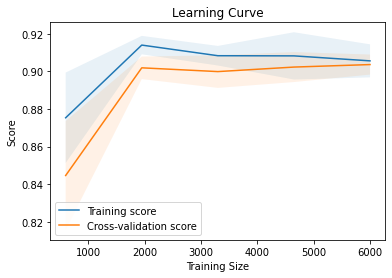

In [30]:
# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_100k, train_scores_100k, valid_scores_100k = learning_curve(model_100k, X_train_10k, Y_train_10k)

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_100k, axis=1)
train_std = np.std(train_scores_100k, axis=1)
valid_mean = np.mean(valid_scores_100k, axis=1)
valid_std = np.std(valid_scores_100k, axis=1)

# Graficamos la curva de entrenamiento
plt.plot(train_sizes_100k, train_mean, label='Training score')
plt.plot(train_sizes_100k, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes_100k, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes_100k, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

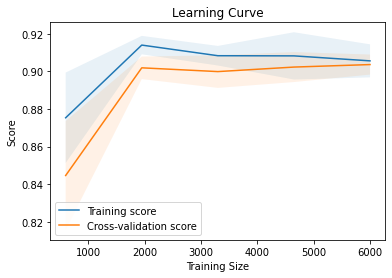

In [28]:
# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_10k, train_scores, valid_scores = learning_curve(model_10k, X_train_10k, Y_train_10k)

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

In [49]:
a = np.array([[0,0,0,0,0]])
test_pred = model_10k.predict(a)
print(test_pred)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.